In [231]:
import numpy as np
import timeit
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from io import BytesIO
import requests

# Максимум 5 баллов - по 1 баллу за задание

### 1. Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.
Для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ 3.

In [232]:
#1.1
def diag_matrix_mult_cycle(X):
    ans = 1
    for i in range(min(X.shape)):
        if X[i][i] != 0:
            ans *= X[i][i]
    return ans

In [233]:
#1.2
def diag_matrix_mult_vector(X):
    return np.prod(X.diagonal()[X.diagonal() != 0])

In [234]:
#1.3
def diag_matrix_mult_combined(X):
    ans = 1
    for element in X.diagonal():
        if element != 0:
            ans *= element
    return ans

In [235]:
#Проверка
X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])
print(diag_matrix_mult_cycle(X), diag_matrix_mult_vector(X), diag_matrix_mult_combined(X))

3 3 3


In [236]:
#Тестрование на матрицах различного размера
X_2 = np.random.randint(0, 5, size=(10, 10))
X_3 = np.random.randint(0, 5, size=(100, 100))
X_4 = np.random.randint(0, 5, size=(1000, 1000))
X_5 = np.random.randint(0, 5, size=(10000, 10000))
time_cycle = [timeit.timeit(lambda: diag_matrix_mult_cycle(X), number=1000) / 1000,
             timeit.timeit(lambda: diag_matrix_mult_cycle(X_2), number=1000) / 1000,
             timeit.timeit(lambda: diag_matrix_mult_cycle(X_3), number=1000) / 1000,
             timeit.timeit(lambda: diag_matrix_mult_cycle(X_4), number=1000) / 1000,
             timeit.timeit(lambda: diag_matrix_mult_cycle(X_5), number=1000) / 1000]
time_vector = [timeit.timeit(lambda: diag_matrix_mult_vector(X), number=1000) / 1000,
             timeit.timeit(lambda: diag_matrix_mult_vector(X_2), number=1000) / 1000,
             timeit.timeit(lambda: diag_matrix_mult_vector(X_3), number=1000) / 1000,
             timeit.timeit(lambda: diag_matrix_mult_vector(X_4), number=1000) / 1000,
             timeit.timeit(lambda: diag_matrix_mult_vector(X_5), number=1000) / 1000]
time_combined = [timeit.timeit(lambda: diag_matrix_mult_combined(X), number=1000) / 1000,
             timeit.timeit(lambda: diag_matrix_mult_combined(X_2), number=1000) / 1000,
             timeit.timeit(lambda: diag_matrix_mult_combined(X_3), number=1000) / 1000,
             timeit.timeit(lambda: diag_matrix_mult_combined(X_4), number=1000) / 1000,
             timeit.timeit(lambda: diag_matrix_mult_combined(X_5), number=1000) / 1000]

C:\Users\baben_bakg1j1\AppData\Local\Temp\ipykernel_23620\135554100.py:6: RuntimeWarning: overflow encountered in scalar multiply
  ans *= X[i][i]


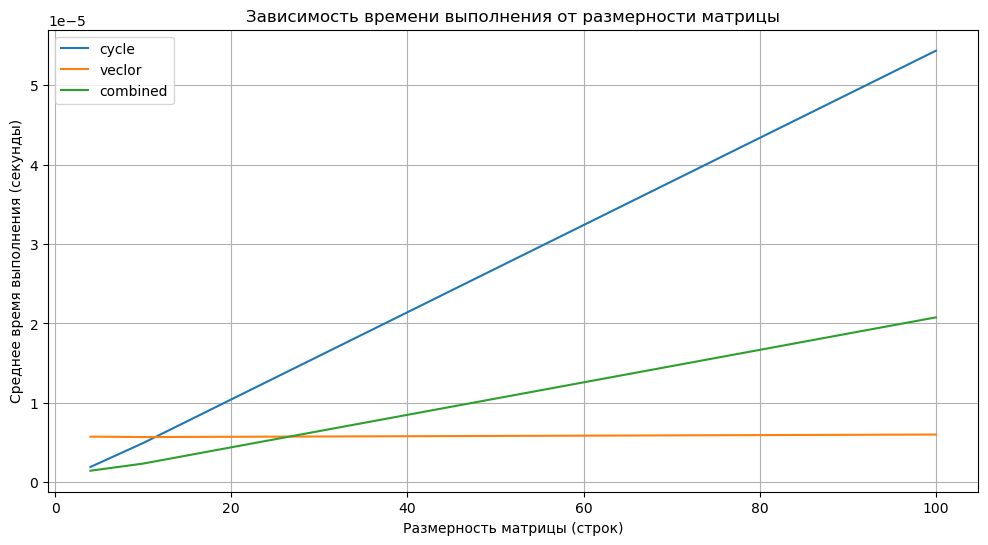

In [237]:
plt.figure(figsize=(12, 6))
plt.plot([len(x) for x in [X ,X_2, X_3]], time_cycle[:3], label='cycle')
plt.plot([len(x) for x in [X ,X_2, X_3]], time_vector[:3], label='veclor')
plt.plot([len(x) for x in [X ,X_2, X_3]], time_combined[:3], label='combined')

plt.xlabel('Размерность матрицы (строк)')
plt.ylabel('Среднее время выполнения (секунды)')
plt.title('Зависимость времени выполнения от размерности матрицы')
plt.legend()
plt.grid(True)
plt.show()

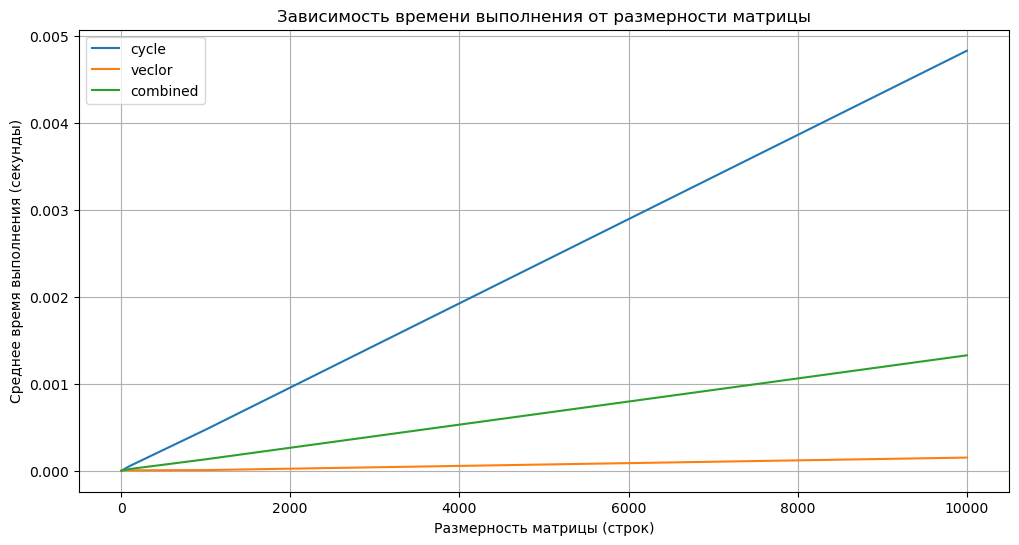

In [238]:
plt.figure(figsize=(12, 6))
plt.plot([len(x) for x in [X ,X_2, X_3, X_4, X_5]], time_cycle, label='cycle')
plt.plot([len(x) for x in [X ,X_2, X_3, X_4, X_5]], time_vector, label='veclor')
plt.plot([len(x) for x in [X ,X_2, X_3, X_4, X_5]], time_combined, label='combined')

plt.xlabel('Размерность матрицы (строк)')
plt.ylabel('Среднее время выполнения (секунды)')
plt.title('Зависимость времени выполнения от размерности матрицы')
plt.legend()
plt.grid(True)
plt.show()

**Выод:** В тестах на скороть работы 3 методов на матрицах с размерностью до 10000x10000 выяснилось, что на матрицах с небольшой размерностью комбинированный и циклический методы работают быстрее векторного, но на больших матрицах векторный метод показывает себя на много лучше и имеет очень схожее время работы, вне зависимости от размерности матрицы, а время работы комбинированного и циклического метода начинает возрастать, но комбинированный метод работает быстрее циклического.

### * Дана матрица X и два вектора одинаковой длины i и j. Построить вектор np.array([X[i[0], j[0]], X[i[1], j[1]], ... , X[i[N-1], j[N-1]]]).

###  (Случайно сдеал из прошлогоднего ДЗ)

In [239]:
#*.1
def vector_by_index_vector(X, i, j):
    return np.array(X[i, j])

In [240]:
#*.2
def vector_by_index_cycle(X, i, j):
    vector = np.array([], dtype=int)
    for k in range(len(i)):
        vector = np.append(vector, X[i[k], j[k]])
    return vector

In [241]:
#*.3
def vector_by_index_combined(X, i, j):
    temp = np.vectorize(lambda i, j: X[i, j])
    return temp(i, j)

In [242]:
#Проверка
X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

i = np.array([0, 1, 2])
j = np.array([1, 2, 0])

print(vector_by_index_vector(X, i, j))
print(vector_by_index_cycle(X, i, j))
print(vector_by_index_combined(X, i, j))

[2 6 7]
[2 6 7]
[2 6 7]


In [243]:
#Тестрование на векторах различного размера
i_2 = np.random.randint(0, 3, size=(10))
j_2 = np.random.randint(0, 3, size=(10))
i_3 = np.random.randint(0, 3, size=(100))
j_3 = np.random.randint(0, 3, size=(100))
i_4 = np.random.randint(0, 3, size=(1000))
j_4 = np.random.randint(0, 3, size=(1000))
time_vector = [timeit.timeit(lambda: vector_by_index_vector(X, i, j), number=1000) / 1000,
             timeit.timeit(lambda: vector_by_index_vector(X, i_2, j_2), number=1000) / 1000,
             timeit.timeit(lambda: vector_by_index_vector(X, i_3, j_3), number=1000) / 1000,
             timeit.timeit(lambda: vector_by_index_vector(X, i_4, j_4), number=1000) / 1000]
time_cycle = [timeit.timeit(lambda: vector_by_index_cycle(X, i, j), number=1000) / 1000,
             timeit.timeit(lambda: vector_by_index_cycle(X, i_2, j_2), number=1000) / 1000,
             timeit.timeit(lambda: vector_by_index_cycle(X, i_3, j_3), number=1000) / 1000,
             timeit.timeit(lambda: vector_by_index_cycle(X, i_4, j_4), number=1000) / 1000]
time_combined = [timeit.timeit(lambda: vector_by_index_combined(X, i, j), number=1000) / 1000,
             timeit.timeit(lambda: vector_by_index_combined(X, i_2, j_2), number=1000) / 1000,
             timeit.timeit(lambda: vector_by_index_combined(X, i_3, j_3), number=1000) / 1000,
             timeit.timeit(lambda: vector_by_index_combined(X, i_4, j_4), number=1000) / 1000]

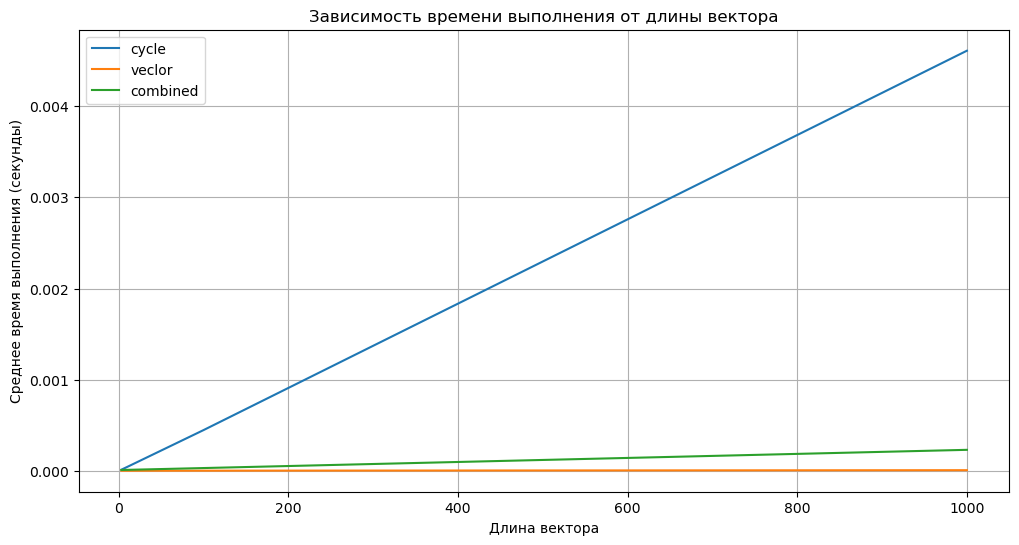

In [244]:
plt.figure(figsize=(12, 6))
plt.plot([len(x) for x in [i ,i_2, i_3, i_4]], time_cycle, label='cycle')
plt.plot([len(x) for x in [i ,i_2, i_3, i_4]], time_vector, label='veclor')
plt.plot([len(x) for x in [i ,i_2, i_3, i_4]], time_combined, label='combined')

plt.xlabel('Длина вектора')
plt.ylabel('Среднее время выполнения (секунды)')
plt.title('Зависимость времени выполнения от длины вектора')
plt.legend()
plt.grid(True)
plt.show()

**Выод:** В тестах на скороть работы 3 методов на векторах с длиной до 1000 выяснилось, что векторный метод показал себя лучше всего и имел однинаковое время работы при любой длине i и j, несколько хуже его повел себя комбинорованный метод, время работы которого плавно росло с увеличением длины вектора и самым медленным оказался циклический метод, который уже слишком долго начинает работать на больших величинах i и j.

### 2. Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.
Для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ True.

In [245]:
#2.1
def if_multiset_vector(x, y):
    return np.array_equal(np.sort(x), np.sort(y))

In [246]:
#2.2
def if_multiset_combined(x, y):
    unique_x, counts_x = np.unique(x, return_counts=True)
    unique_y, counts_y = np.unique(y, return_counts=True)
    return np.array_equal(unique_x, unique_y) and np.array_equal(counts_x, counts_y)

In [247]:
#2.3
def if_multiset_cycle(x, y):
    if len(x) != len(y):
        return False
    counter_x = {}
    counter_y = {}
    for element in x:
        if element in counter_x:
            counter_x[element] += 1
        else:
            counter_x[element] = 1
    for element in y:
        if element in counter_y:
            counter_y[element] += 1
        else:
            counter_y[element] = 1

    return counter_x == counter_y

In [248]:
#Проверка
x = np.array([1, 2, 2, 4])
y = np.array([4, 2, 1, 2])
print(if_multiset_vector(x, y))
print(if_multiset_combined(x, y))
print(if_multiset_cycle(x, y))

True
True
True


In [249]:
#Тестрование на векторах различного размера
x_2 = np.random.randint(0, 3, size=(100))
y_2 = np.random.randint(0, 3, size=(100))
x_3 = np.random.randint(0, 3, size=(1000))
y_3 = np.random.randint(0, 3, size=(1000))
x_4 = np.random.randint(0, 3, size=(10000))
y_4 = np.random.randint(0, 3, size=(10000))
time_vector = [timeit.timeit(lambda: if_multiset_vector(x, y), number=1000) / 1000,
             timeit.timeit(lambda: if_multiset_vector(x_2, y_2), number=1000) / 1000,
             timeit.timeit(lambda: if_multiset_vector(x_3, y_3), number=1000) / 1000,
             timeit.timeit(lambda: if_multiset_vector(x_4, y_4), number=1000) / 1000]
time_cycle = [timeit.timeit(lambda: if_multiset_cycle(x, y), number=1000) / 1000,
             timeit.timeit(lambda: if_multiset_cycle(x_2, y_2), number=1000) / 1000,
             timeit.timeit(lambda: if_multiset_cycle(x_3, y_3), number=1000) / 1000,
             timeit.timeit(lambda: if_multiset_cycle(x_4, y_4), number=1000) / 1000]
time_combined = [timeit.timeit(lambda: if_multiset_combined(x, y), number=1000) / 1000,
             timeit.timeit(lambda: if_multiset_combined(x_2, y_2), number=1000) / 1000,
             timeit.timeit(lambda: if_multiset_combined(x_3, y_3), number=1000) / 1000,
             timeit.timeit(lambda: if_multiset_combined(x_4, y_4), number=1000) / 1000]

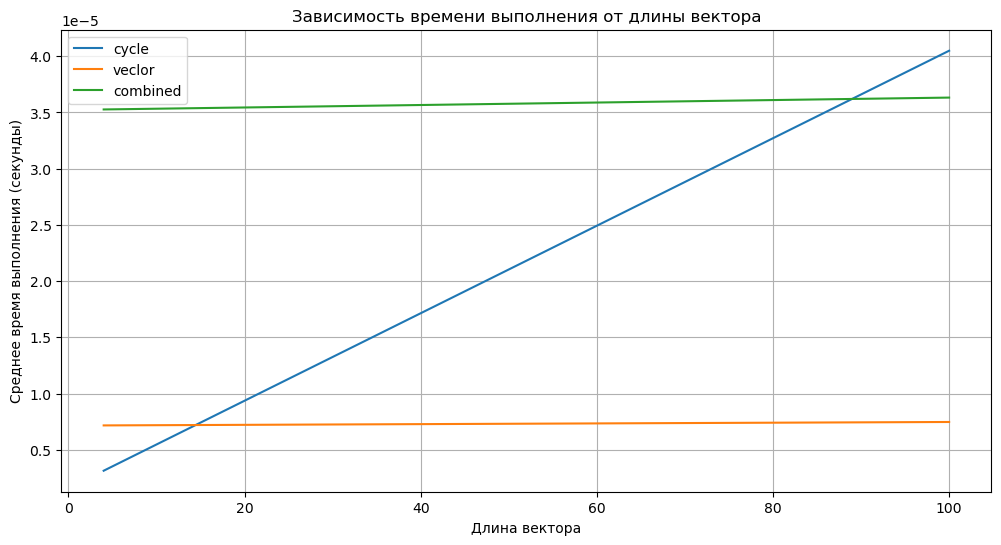

In [250]:
plt.figure(figsize=(12, 6))
plt.plot([len(x) for x in [x ,x_2]], time_cycle[:2], label='cycle')
plt.plot([len(x) for x in [x ,x_2]], time_vector[:2], label='veclor')
plt.plot([len(x) for x in [x ,x_2]], time_combined[:2], label='combined')

plt.xlabel('Длина вектора')
plt.ylabel('Среднее время выполнения (секунды)')
plt.title('Зависимость времени выполнения от длины вектора')
plt.legend()
plt.grid(True)
plt.show()

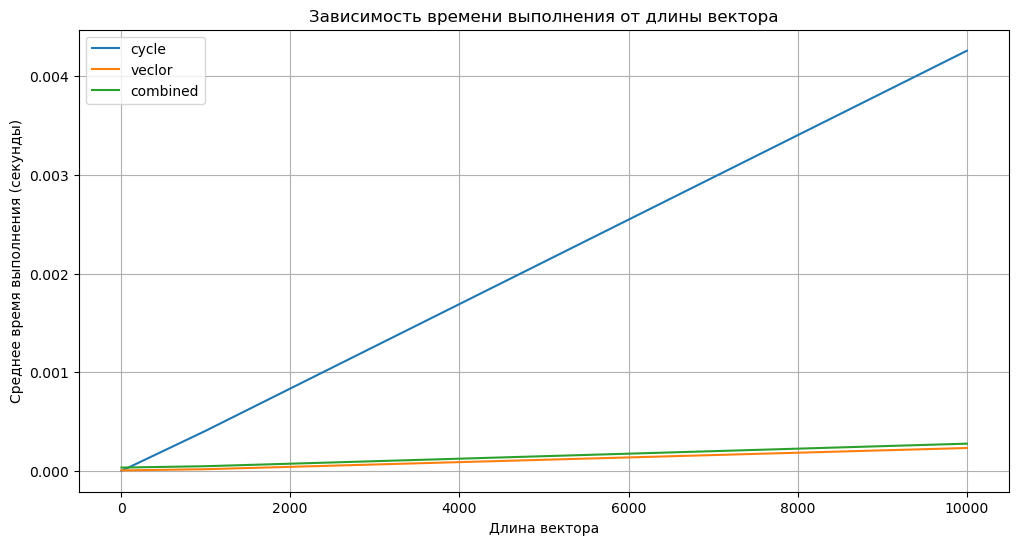

In [251]:
plt.figure(figsize=(12, 6))
plt.plot([len(x) for x in [x ,x_2, x_3, x_4]], time_cycle, label='cycle')
plt.plot([len(x) for x in [x ,x_2, x_3, x_4]], time_vector, label='veclor')
plt.plot([len(x) for x in [x ,x_2, x_3, x_4]], time_combined, label='combined')

plt.xlabel('Длина вектора')
plt.ylabel('Среднее время выполнения (секунды)')
plt.title('Зависимость времени выполнения от длины вектора')
plt.legend()
plt.grid(True)
plt.show()

**Выод:** В тестах на скороть работы 3 методов на векторах с длиной до 10000 выяснилось, что векторный метод показал себя лучше всего и не сильно терял в скорости при увеличении длины i и j, чуть хуже его повел себя комбинорованный метод и самым медленным оказался циклический метод, который уже слишком долго начинает работать на больших величинах i и j. Однако на очень маленких векторах циклический мтод работал быстрее остальных.

### 3. Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.
Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ 5.

In [252]:
#3.1
def max_after_0_cycle(x):
    m = None
    if len(x) > 1:
        for i in range(1, len(x)):
            if x[i-1] == 0:
                m = x[i]
                break
        for j in range(i+1, len(x)):
            if x[j-1] == 0 and x[j] > m:
                m = x[j]
    return m

In [253]:
#3.2
def max_after_0_vector(x):
    if len(x) > 1:
        return max(x[(np.where(x == 0)[0] + 1)[np.where(x == 0)[0] + 1 < len(x)]])
    else:
        return None

In [254]:
#3.3
def max_after_0_combined(x):
    indices = np.where(x == 0)[0]
    if len(indices) > 1 and indices[0] - 1 < len(x):
        m = x[indices[0] + 1]
        for index in indices:
            if index + 1 < len(x):
                if x[index+1] > m:
                    m = x[index+1]
            else:
                break
        return m
    else:
        return None

In [255]:
#Проверка
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(max_after_0_cycle(x))
print(max_after_0_vector(x))
print(max_after_0_combined(x))

5
5
5


In [256]:
#Тестрование на векторах различного размера
x_2 = np.random.randint(0, 3, size=(100))
x_3 = np.random.randint(0, 3, size=(1000))
x_4 = np.random.randint(0, 3, size=(10000))
time_vector = [timeit.timeit(lambda: max_after_0_vector(x), number=1000) / 1000,
             timeit.timeit(lambda: max_after_0_vector(x_2), number=1000) / 1000,
             timeit.timeit(lambda: max_after_0_vector(x_3), number=1000) / 1000,
             timeit.timeit(lambda: max_after_0_vector(x_4), number=1000) / 1000]
time_cycle = [timeit.timeit(lambda: max_after_0_cycle(x), number=1000) / 1000,
             timeit.timeit(lambda: max_after_0_cycle(x_2), number=1000) / 1000,
             timeit.timeit(lambda: max_after_0_cycle(x_3), number=1000) / 1000,
             timeit.timeit(lambda: max_after_0_cycle(x_4), number=1000) / 1000]
time_combined = [timeit.timeit(lambda: max_after_0_combined(x), number=1000) / 1000,
             timeit.timeit(lambda: max_after_0_combined(x_2), number=1000) / 1000,
             timeit.timeit(lambda: max_after_0_combined(x_3), number=1000) / 1000,
             timeit.timeit(lambda: max_after_0_combined(x_4), number=1000) / 1000]

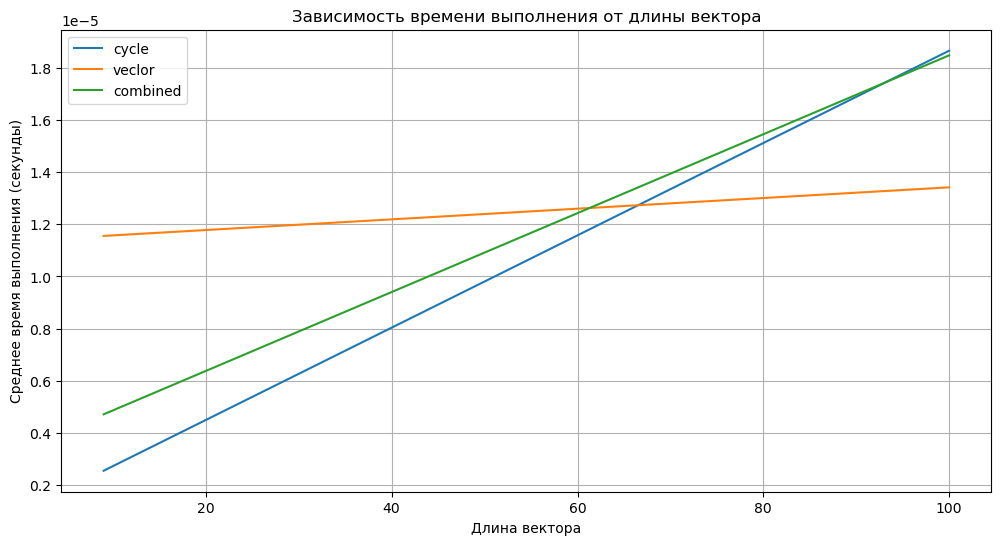

In [257]:
plt.figure(figsize=(12, 6))
plt.plot([len(x) for x in [x ,x_2]], time_cycle[:2], label='cycle')
plt.plot([len(x) for x in [x ,x_2]], time_vector[:2], label='veclor')
plt.plot([len(x) for x in [x ,x_2]], time_combined[:2], label='combined')

plt.xlabel('Длина вектора')
plt.ylabel('Среднее время выполнения (секунды)')
plt.title('Зависимость времени выполнения от длины вектора')
plt.legend()
plt.grid(True)
plt.show()

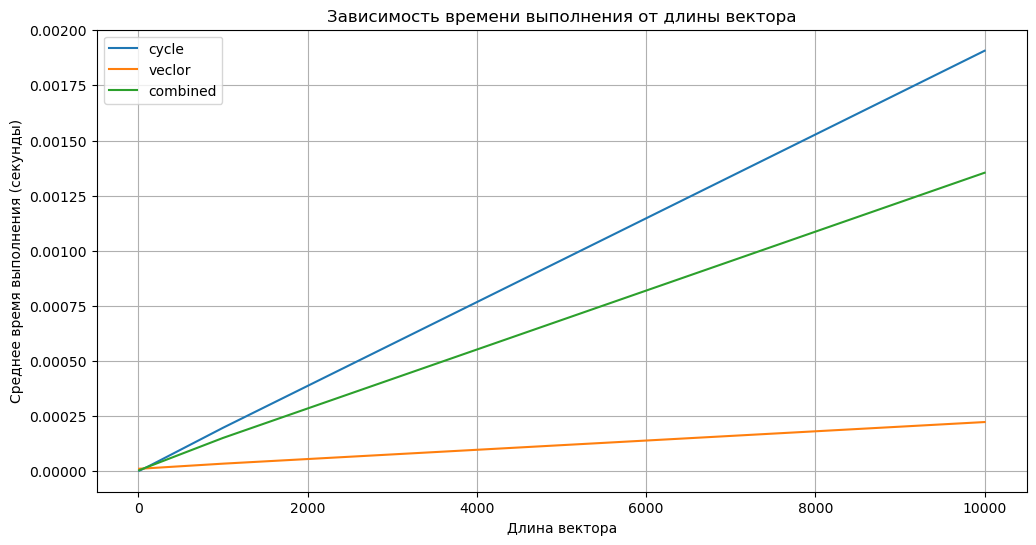

In [258]:
plt.figure(figsize=(12, 6))
plt.plot([len(x) for x in [x ,x_2, x_3, x_4]], time_cycle, label='cycle')
plt.plot([len(x) for x in [x ,x_2, x_3, x_4]], time_vector, label='veclor')
plt.plot([len(x) for x in [x ,x_2, x_3, x_4]], time_combined, label='combined')

plt.xlabel('Длина вектора')
plt.ylabel('Среднее время выполнения (секунды)')
plt.title('Зависимость времени выполнения от длины вектора')
plt.legend()
plt.grid(True)
plt.show()

**Выод:** В тестах на скороть работы 3 методов на векторах с длиной до 10000 выяснилось, что на векторах с небольшой длиной циклический метод работает немного быстрее остальных, потом по скорости идет комбинированный, но на больших матрицах векторный метод показывает себя на много лучше и с увеличением длины исходного вектора не сильно теряет во времени работы, когда время работы комбинированного и циклического метода начинает сильно возрастать, но комбинированный метод работает быстрее циклического.

### 4. Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow: conda install pillow). Преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]).

In [259]:
#4.1
def grey_img_vector(img, weights):
    return np.dot(img[:, :, :3], weights)

In [260]:
#4.2
def grey_img_cycle(img, weights):
    grey_img = []
    for i in range(len(img)):
        row = []
        for j in range(len(img[i])):
            p = 0
            for k in range(3):
                p += img[i][j][k] * weights[k]
            row.append(p)
        grey_img.append(row)
    return grey_img

In [261]:
#4.3
def grey_img_combined(img, weights):
    grey_img = []
    for i in range(len(img)):
        row = []
        for j in range(len(img[i])):
            row.append(np.dot(img[i, j, :3], weights))
        grey_img.append(row)
    return grey_img

In [263]:
#Проверка
'''
image_100x100 = imageio.imread('im_100x100.png')
image_600x600 = imageio.imread('im_600x600.png')
image_1600x1600 = imageio.imread('im_1500x1500.png')
'''
image_100x100 = imageio.imread(BytesIO(requests.get('https://zismo.biz/uploads/profile/photo-thumb-484858.gif?_r=1551852640').content))
image_600x600 = imageio.imread(BytesIO(requests.get('https://art.pixilart.com/thumb/9335b2543381743.png').content))
image_1600x1600 = imageio.imread(BytesIO(requests.get('https://distribution.faceit-cdn.net/images/8f1646a9-f8d8-4f3d-854e-cebd9bf44179.jpeg').content))

weights = np.array([0.299, 0.587, 0.114])

print(image_100x100.shape, image_600x600.shape, image_1600x1600.shape)
print(np.shape(grey_img_cycle(image_100x100, weights)), np.shape(grey_img_combined(image_600x600, weights)), grey_img_vector(image_1600x1600, weights).shape)


(100, 100, 4) (600, 600, 3) (1500, 1500, 3)
(100, 100) (600, 600) (1500, 1500)


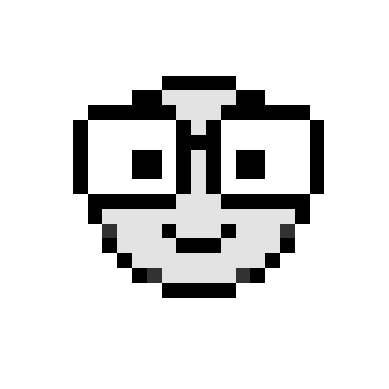

In [264]:
plt.imshow(grey_img_cycle(image_100x100, weights), cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
plt.imshow(grey_img_combined(image_600x600, weights), cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
plt.imshow(grey_img_vector(image_1600x1600, weights), cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
#Тестрование на векторах различного размера
time_vector = [timeit.timeit(lambda: grey_img_vector(image_100x100, weights), number=1),
             timeit.timeit(lambda: grey_img_vector(image_600x600, weights), number=1),
             timeit.timeit(lambda: grey_img_vector(image_1600x1600, weights), number=1)]
time_cycle = [timeit.timeit(lambda: grey_img_cycle(image_100x100, weights), number=1),
             timeit.timeit(lambda: grey_img_cycle(image_600x600, weights), number=1),
             timeit.timeit(lambda: grey_img_cycle(image_1600x1600, weights), number=1)]
time_combined = [timeit.timeit(lambda: grey_img_combined(image_100x100, weights), number=1),
             timeit.timeit(lambda: grey_img_combined(image_600x600, weights), number=1),
             timeit.timeit(lambda: grey_img_combined(image_1600x1600, weights), number=1)]

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot([len(x) for x in [image_100x100 ,image_600x600, image_1600x1600]], time_cycle, label='cycle')
plt.plot([len(x) for x in [image_100x100 ,image_600x600, image_1600x1600]], time_vector, label='veclor')
plt.plot([len(x) for x in [image_100x100 ,image_600x600, image_1600x1600]], time_combined, label='combined')

plt.xlabel('Длина вектора')
plt.ylabel('Среднее время выполнения (секунды)')
plt.title('Зависимость времени выполнения от длины вектора')
plt.legend()
plt.grid(True)
plt.show()

**Выод:** В тестах на скороть работы 3 методов на картинках с разрешением до 1500x1500 выяснилось, что на картинках с любым разрешением векторный метод работает с очень схожим низким временем, циклический и комбинированный методы работают очень медленно, но комбинированный лучше циклического. (Были проведены тесты и с изображениями большего размера, но из-за слишком долгого времени работы для циклического и комбинированного методов (на 3000x3000 - боллее минуты) было решено не включать изображения такого разрешения в анализ)

### 5. Реализовать кодирование длин серий (Run-length encoding). Дан вектор x. Необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.
Пример: x = np.array([2, 2, 2, 3, 3, 3, 5, 2, 2]). Ответ: (np.array([2, 3, 5, 2]), np.array([3, 3, 1, 2])).

In [ ]:
#5.1
def run_length_enc_cycle(x):
    numbers = []
    counts = []
    current_number = x[0]
    current_count = 1
    for i in range(1, len(x)):
        if x[i] == current_number:
            current_count += 1
        else:
            numbers.append(current_number)
            counts.append(current_count)
            current_number = x[i]
            current_count = 1
    numbers.append(current_number)
    counts.append(current_count)
    return np.array(numbers), np.array(counts)

In [ ]:
#5.2
def run_length_enc_vector(x):
    idx = np.where(x[:-1] != x[1:])[0]
    counts = np.diff(np.concatenate(([0], idx, [len(x)-1])))
    numbers = x[np.append(idx, len(x) - 1)]
    return numbers, counts

In [ ]:
#5.3
def run_length_enc_combined(x):
    idx = []
    for i in range(1, len(x)):
        if x[i] != x[i-1]:
            idx.append(i-1)
    counts = np.diff(np.concatenate(([0], idx, [len(x)-1])))
    numbers = x[np.append(idx, len(x) - 1)]
    return numbers, counts

In [ ]:
#Поверка
x = np.array([2, 2, 2, 3, 3, 3, 5, 2, 2])
print(run_length_enc_cycle(x))
print(run_length_enc_vector(x))
print(run_length_enc_combined(x))

In [ ]:
#Тестрование на векторах различного размера
x_2 = np.random.randint(0, 3, size=(100))
x_3 = np.random.randint(0, 3, size=(1000))
x_4 = np.random.randint(0, 3, size=(10000))
time_vector = [timeit.timeit(lambda: run_length_enc_vector(x), number=1000) / 1000,
             timeit.timeit(lambda: run_length_enc_vector(x_2), number=1000) / 1000,
             timeit.timeit(lambda: run_length_enc_vector(x_3), number=1000) / 1000,
             timeit.timeit(lambda: run_length_enc_vector(x_4), number=1000) / 1000]
time_cycle = [timeit.timeit(lambda: run_length_enc_cycle(x), number=1000) / 1000,
             timeit.timeit(lambda: run_length_enc_cycle(x_2), number=1000) / 1000,
             timeit.timeit(lambda: run_length_enc_cycle(x_3), number=1000) / 1000,
             timeit.timeit(lambda: run_length_enc_cycle(x_4), number=1000) / 1000]
time_combined = [timeit.timeit(lambda: run_length_enc_combined(x), number=1000) / 1000,
             timeit.timeit(lambda: run_length_enc_combined(x_2), number=1000) / 1000,
             timeit.timeit(lambda: run_length_enc_combined(x_3), number=1000) / 1000,
             timeit.timeit(lambda: run_length_enc_combined(x_4), number=1000) / 1000]

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot([len(x) for x in [x ,x_2, x_3, x_4]], time_cycle, label='cycle')
plt.plot([len(x) for x in [x ,x_2, x_3, x_4]], time_vector, label='veclor')
plt.plot([len(x) for x in [x ,x_2, x_3, x_4]], time_combined, label='combined')

plt.xlabel('Длина вектора')
plt.ylabel('Среднее время выполнения (секунды)')
plt.title('Зависимость времени выполнения от длины вектора')
plt.legend()
plt.grid(True)
plt.show()

**Выод:** В тестах на скороть работы 3 методов на векторах с длиной до 10000 выяснилось, что, как на векторах с небольшой длиной, так и на больших, векторный метод имеет почтоянное маленькое время работы. Время циклического и комбинорованного методов примерно одинаково быстро возрастает с увеличением размера вектора, но комбинированный метод работает чуть дольше.

# Общий вывод:
По итогам проделанной работы можно сделать вывод, что векторизированные решения с NumPy обычно являются наиболее эффективными благодаря оптимизированным функциям для работы с массивами. На всех тестах такие решения имели минимальное и практически одинаковое время работы, вне зависимости от размера подаваемых данных. Векторизированные решения позволяют избежать явного написания циклов, что приводит к ускорению вычислений, а так же значительно уменьшают колличество кода. Когда решения с циклами работали очень медленно и выглядели громоздко. Комбинированные решения показали себя лучше циклов, но это связано с тем, что там частично использовались векторизированные решения с NumPy.

**Нужно всегда стараться избегать лишних циклов и использовать векторные операции, если есть такая возможность!**